# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

## About Dataset

**Context:**

Rats in New York City are prevalent, as in many densely populated areas. For a long time, the exact number of rats in New York City was unknown, and a common urban legend was that there were up to four times as many rats as people. In 2014, however, scientists more accurately measured the entire city's rat population to be approximately only 25% of the number of humans; i.e., there were approximately 2 million rats to New York's 8.4 million people at the time of the study.[1][2]

**Content:**

New York City rodent complaints can be made online, or by dialing 3-1-1, and the New York City guide Preventing Rats on Your Property discusses how the New York City Health Department inspects private and public properties for rats. Property owners that fail inspections receive a Commissioner's Order and have five days to correct the problem. If after five days the property fails a second inspection, the owner receives a Notice of Violation and can be fined. The property owner is billed for any clean-up or extermination carried out by the Health Department.

**Data is from 2010-Sept 16th, 2017 and includes date, location (lat/lon), type of structure, borough, and community board.**

Acknowledgements:
Data was produced by the City of New York via their 311 portal.

**Inspiration:**

**Where and when are rats most seen?**

**Can you predict rat sightings from previous data?**

**Are there any trends in rat sightings?**

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas_profiling as pp
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from nltk.metrics import edit_distance
import missingno as msno

In [2]:
# Create a new dataframe from your CSV
df=pd.read_csv("Rat_Sightings.csv")

## Understand the data set

In [3]:
# Print out any information you need to understand your dataframe
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [4]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)"
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233.0,829 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)"
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)"
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)"
101913,35502334,02/15/2017 04:39:49 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11238.0,89 LEFFERTS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681130,-73.959936,"(40.68113007777712, -73.95993644360209)"


In [5]:
df.info()

#The info() method of pandas.DataFrame can display information such as the number of rows and columns, 
#the total memory usage, the data type of each column, and the number of non-NaN elements.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

In [6]:
df.shape

#The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple
#(number of rows, number of columns).

(101914, 52)

In [7]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns

numeric_cols

Index(['Unique Key', 'Incident Zip', 'Facility Type',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

non_numeric_cols

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location'],
      dtype='object')

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

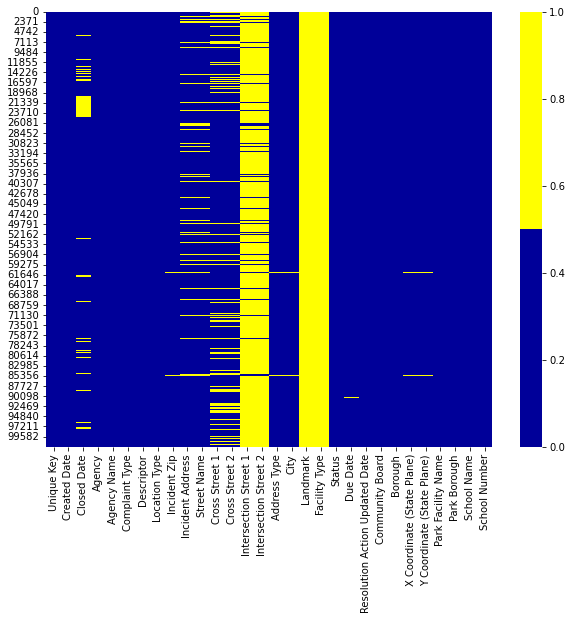

In [11]:
# Plot a heatmap of any missing data
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: blue(first code) - not missing. yellow - missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))


The horizontal axis shows the column names; the vertical axis shows the number of rows; the yellow color represents the missing data while the blue color is otherwise.

Heat map of the first 30 rows show:Landmark, Facility Type, Intersection 1 and 2 have missing values throughout all or almost all the rows.

<AxesSubplot:>

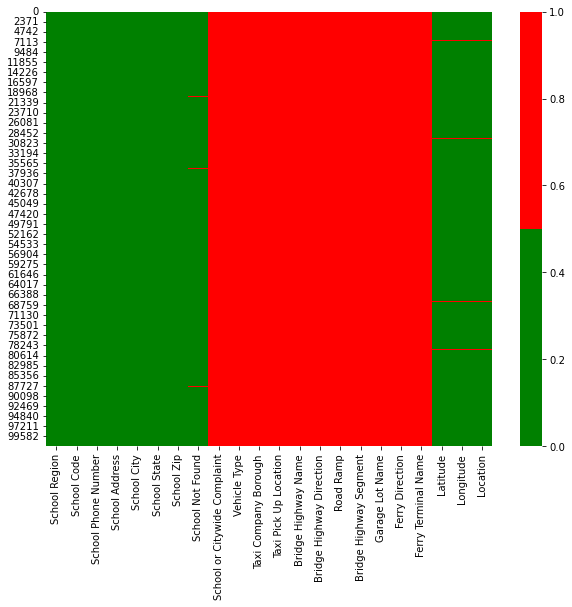

In [12]:
plt.figure(figsize=(10,8))

cols = df.columns[30:52]
colours = ['green', 'red'] # specify colours: green -not missing. red - missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))


Heat map of columns 30 to 52 show a significant block of null data (100%) from the following columns:

-School or Citywide Complaint  0 non-null       
-Vehicle Type                  0 non-null       
-Taxi Company Borough          0 non-null       
-Taxi Pick Up Location         0 non-null      
-Bridge Highway Name           0 non-null       
-Bridge Highway Direction      0 non-null      
-Road Ramp                     0 non-null      
-Bridge Highway Segment        0 non-null      
-Garage Lot Name               0 non-null       
-Ferry Direction               0 non-null      
-Ferry Terminal Name

In [13]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Created Date                    101914 non-null  object
 1   Closed Date                     90983 non-null   object
 2   Agency                          101914 non-null  object
 3   Agency Name                     101914 non-null  object
 4   Complaint Type                  101914 non-null  object
 5   Descriptor                      101914 non-null  object
 6   Location Type                   101908 non-null  object
 7   Incident Address                92840 non-null   object
 8   Street Name                     92839 non-null   object
 9   Cross Street 1                  85257 non-null   object
 10  Cross Street 2                  85224 non-null   object
 11  Intersection Street 1           8925 non-null    object
 12  Intersection Street 2         

In [14]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unique Key                    101914 non-null  int64  
 1   Incident Zip                  101578 non-null  float64
 2   Facility Type                 0 non-null       float64
 3   X Coordinate (State Plane)    101208 non-null  float64
 4   Y Coordinate (State Plane)    101208 non-null  float64
 5   School or Citywide Complaint  0 non-null       float64
 6   Vehicle Type                  0 non-null       float64
 7   Taxi Company Borough          0 non-null       float64
 8   Taxi Pick Up Location         0 non-null       float64
 9   Bridge Highway Name           0 non-null       float64
 10  Bridge Highway Direction      0 non-null       float64
 11  Road Ramp                     0 non-null       float64
 12  Bridge Highway Segment        0 non-null    

In [15]:
num_missing = df.isna().sum()

num_missing

Unique Key                             0
Created Date                           0
Closed Date                        10931
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                          6
Incident Zip                         336
Incident Address                    9074
Street Name                         9075
Cross Street 1                     16657
Cross Street 2                     16690
Intersection Street 1              92989
Intersection Street 2              92989
Address Type                         346
City                                 342
Landmark                          101879
Facility Type                     101914
Status                                 0
Due Date                             117
Resolution Action Updated Date         3
Community Board                        0
Borough                                0
X Coordinate (St

In [16]:
# Try out a missing data percentage list! 
pct_missing = df.isna().mean()

pct_missing*100


Unique Key                          0.000000
Created Date                        0.000000
Closed Date                        10.725710
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          0.000000
Location Type                       0.005887
Incident Zip                        0.329690
Incident Address                    8.903585
Street Name                         8.904567
Cross Street 1                     16.344173
Cross Street 2                     16.376553
Intersection Street 1              91.242616
Intersection Street 2              91.242616
Address Type                        0.339502
City                                0.335577
Landmark                           99.965657
Facility Type                     100.000000
Status                              0.000000
Due Date                            0.114803
Resolution Action Updated Date      0.002944
Community 

In [17]:
# Plot a missing data histogram
# for col in df.columns:
#     missing = df[col].isnull()
#     num_missing = np.sum(missing)
    
#     if num_missing > 0:  
#         print('created missing indicator for: {}'.format(col))
#         df['{}_ismissing'.format(col)] = missing


# # then based on the indicator, plot the histogram of missing values
# ismissing_cols = [col for col in df.columns if 'ismissing' in col]
# df['num_missing'] = df[ismissing_cols].sum(axis=1)

# df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


    

<AxesSubplot:>

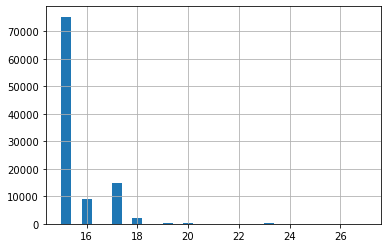

In [18]:
#Missing rows histogram

missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=30)

#This histogram helps to identify the missing patterns among the 101914 entries. 
#For example, there are over 70,000 observations with close to 0 missing values, 
#and close to 10,000 observations with a little less than 16 missing values.

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [19]:
#number of columns with over 40% missing values

pct_missing[pct_missing >= .4]

#15 columns with over 40% of data missing (b/w 90-100 %)

Intersection Street 1           0.912426
Intersection Street 2           0.912426
Landmark                        0.999657
Facility Type                   1.000000
School or Citywide Complaint    1.000000
Vehicle Type                    1.000000
Taxi Company Borough            1.000000
Taxi Pick Up Location           1.000000
Bridge Highway Name             1.000000
Bridge Highway Direction        1.000000
Road Ramp                       1.000000
Bridge Highway Segment          1.000000
Garage Lot Name                 1.000000
Ferry Direction                 1.000000
Ferry Terminal Name             1.000000
dtype: float64

## Remove missing columns

In [20]:
df_copy=df.copy()

In [21]:
# Handle any missing data in your dataframe.
#df_less_missing_cols = df.loc[:,pct_missing <= .4].copy()

# equivalent to 
#df_less_missing_cols=df.drop(columns=pct_missing[pct_missing > .4].index)

df_copy=df_copy.loc[:,pct_missing <= .4].copy()





In [22]:
#df_less_missing_cols.shape

df_copy.shape


(101914, 37)

In [23]:
#df_less_missing_cols.columns


df_copy.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

## Remove missing rows

In [24]:
df_less_missing_rows = df[missing_by_row < 22].copy()

 # equivalent to df.dropna(axis='index', thresh=292-35+1).shape
    
df_copy=df_less_missing_rows 

#drop missing rows


In [25]:
df_copy=df_copy.loc[:,pct_missing <= .4].copy()
#ensure missing columns are removed from copy variable

 from the missing data histogram shown earlier, we notice that only a small amount of observations have over 22 columns all missing. We can create a new dataset df_less_missing_rows to only keep observations with less than 22 missing columns.

In [26]:
#df.dropna(axis='index', thresh=52-22+1).shape

In [27]:
#df[missing_by_row >= 22].head()

In [28]:
#df_less_missing_rows.shape

df_copy.shape

#397 rows removed, 15 columns removed

(101517, 37)

## Impute the missing with constant values

In [29]:
numeric_cols_copy = df_copy.select_dtypes(include=['number']).columns

In [30]:
non_numeric_cols_copy = df_copy.select_dtypes(exclude=['number']).columns


df_copy[non_numeric_cols_copy] = df_copy[non_numeric_cols_copy].fillna('_UNKNOWN_')

#non numeric values only imputed with unknown

In [31]:
df_copy.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,_UNKNOWN_,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,_UNKNOWN_,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [32]:
non_numeric_cols_copy

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Status', 'Due Date', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Location'],
      dtype='object')

In [33]:
numeric_cols_copy

Index(['Unique Key', 'Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Latitude', 'Longitude'],
      dtype='object')

In [34]:
#numeric_cols
#for comparison purposes

In [35]:
df_copy.kurt(numeric_only=True)[:37]


Unique Key                    -1.035234
Incident Zip                  24.321103
X Coordinate (State Plane)     2.860997
Y Coordinate (State Plane)    -0.843950
Latitude                      -0.843499
Longitude                      2.842520
dtype: float64

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101517 entries, 0 to 101913
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101517 non-null  int64  
 1   Created Date                    101517 non-null  object 
 2   Closed Date                     101517 non-null  object 
 3   Agency                          101517 non-null  object 
 4   Agency Name                     101517 non-null  object 
 5   Complaint Type                  101517 non-null  object 
 6   Descriptor                      101517 non-null  object 
 7   Location Type                   101517 non-null  object 
 8   Incident Zip                    101502 non-null  float64
 9   Incident Address                101517 non-null  object 
 10  Street Name                     101517 non-null  object 
 11  Cross Street 1                  101517 non-null  object 
 12  Cross Street 2  

Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers.

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [36]:
# Plot a histogram to see if there are any outliers.



In [37]:
# Use the describe() method
df_copy.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,1.015170e+05,101502.000000,1.012070e+05,101207.000000,101207.000000,101207.000000
mean,2.816533e+07,10727.795364,1.002473e+06,208640.001551,40.739304,-73.934205
std,6.011612e+06,564.321996,1.958043e+04,29956.341258,0.082225,0.070617
min,1.146439e+07,83.000000,9.134950e+05,121350.000000,40.499502,-74.254437
25%,2.342367e+07,10075.000000,9.936100e+05,186934.000000,40.679740,-73.966216
50%,2.884043e+07,10472.000000,1.001399e+06,203425.000000,40.725009,-73.938112
75%,3.346459e+07,11222.000000,1.011951e+06,236364.000000,40.815430,-73.899963
max,3.719700e+07,11694.000000,1.066922e+06,271876.000000,40.912869,-73.701632


<AxesSubplot:>

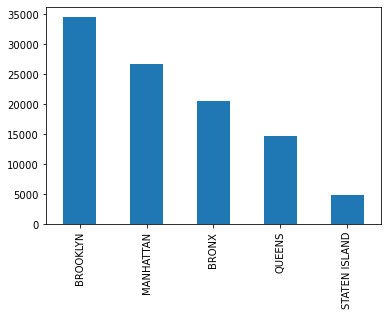

In [68]:
# Plot a bar chart
df_copy['Borough'].value_counts().plot(kind='bar')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [39]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [54]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df_copy)

for col in df_copy.columns:
    cnts = df_copy[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Agency: 100.00%
DOHMH    101517
Name: Agency, dtype: int64

Agency Name: 100.00%
Department of Health and Mental Hygiene    101517
Name: Agency Name, dtype: int64

Complaint Type: 100.00%
Rodent    101517
Name: Complaint Type, dtype: int64

Descriptor: 100.00%
Rat Sighting    101517
Name: Descriptor, dtype: int64

Park Facility Name: 100.00%
Unspecified    101517
Name: Park Facility Name, dtype: int64

School Name: 100.00%
Unspecified    101517
Name: School Name, dtype: int64

School Number: 100.00%
Unspecified    101517
Name: School Number, dtype: int64

School Region: 100.00%
Unspecified    101517
Name: School Region, dtype: int64

School Code: 100.00%
Unspecified    101517
Name: School Code, dtype: int64

School Phone Number: 100.00%
Unspecified    101517
Name: School Phone Number, dtype: int64

School Address: 100.00%
Unspecified    101517
Name: School Address, dtype: int64

School City: 100.00%
Unspecified    101517
Name: School City, dtype: int64

School State: 100.00%
Unspecifie

## The Above Cell:

We generated a list of columns with a high percentage of the same value. For example, we specifed to show columns with over 99.9% rows being the same value.

For the Columns above with a high percentage of the same value, we can drop them when they are not informative or providing key info for analysis, e.g., when the column has 100% being the same value.

**The columns listed above are not informative to the analysis:**

School zip, school state, school city, school address, schhol phone number, school code, school region, school number, school name and park faciilty all have data that say **"Unspecified".**

Agency name and agency are both consistently **Department of Health and Mental Hygiene** 

Complaint type and descriptor are consistently **Rodent and rat sighting** across the data

In [55]:
# Look for duplicates. How will you handle any duplicates?
#We can use the duplicated method to grab the boolean values of whether a row is duplicated, 
#and then use it to filter for duplicated rows from df.


df_copy[df_copy.duplicated()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location


There are no two rows that look exactly the same. So this returns 0 rows. If there were any duplicates, we could remove them. We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.


df.drop_duplicates()

In [42]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [71]:
# Try to convert all the strings in a column to lower or upper case. 

df_copy['City'].value_counts(dropna=False)

BROOKLYN         34533
NEW YORK         26652
BRONX            20643
STATEN ISLAND     4892
Jamaica           1226
                 ...  
QUEENS              11
GLEN OAKS            7
New Hyde Park        5
NEW HYDE PARK        2
MANHATTAN            1
Name: City, Length: 90, dtype: int64

In [76]:
df_copy['city_upper'] = df_copy['City'].str.upper()

df_copy['City']=df_copy['city_upper']



In [78]:
df_copy['City'].value_counts()

BROOKLYN               34533
NEW YORK               26652
BRONX                  20643
STATEN ISLAND           4892
JAMAICA                 2195
RIDGEWOOD               1615
ASTORIA                 1068
WOODSIDE                 786
FLUSHING                 632
LONG ISLAND CITY         560
ELMHURST                 529
OZONE PARK               506
CORONA                   506
SAINT ALBANS             490
JACKSON HEIGHTS          416
MASPETH                  415
MIDDLE VILLAGE           377
EAST ELMHURST            323
QUEENS VILLAGE           319
SOUTH OZONE PARK         313
SOUTH RICHMOND HILL      292
FAR ROCKAWAY             278
REGO PARK                275
SPRINGFIELD GARDENS      264
RICHMOND HILL            258
WHITESTONE               243
FOREST HILLS             226
BAYSIDE                  213
WOODHAVEN                192
SUNNYSIDE                186
HOLLIS                   179
HOWARD BEACH             169
FRESH MEADOWS            125
ROSEDALE                 107
CAMBRIA HEIGHT

## Key insights needed (After Data Cleaning Exercise)

1. Where and when are rats most seen?

2. Can you predict rat sightings from previous data?

3. Are there any trends in rat sightings?

In [59]:
df_copy['Borough'].value_counts(dropna=False)

BROOKLYN         34540
MANHATTAN        26686
BRONX            20643
QUEENS           14754
STATEN ISLAND     4894
Name: Borough, dtype: int64

In [73]:
df_copy['Status'].value_counts(dropna=False)

Closed      73712
Pending     23195
Assigned     4608
Draft           1
Open            1
Name: Status, dtype: int64

In [63]:
df_copy['Descriptor'].value_counts()

Rat Sighting    101517
Name: Descriptor, dtype: int64

In [75]:
col =['Created Date','Closed Date','Borough','City','Incident Zip','Location Type','Descriptor','Status','Resolution Action Updated Date']
nyc_rat = df_copy[col] # I take only the necessary columns 
nyc_rat.head()

,Created Date,Closed Date,Borough,City,Incident Zip,Location Type,Descriptor,Status,Resolution Action Updated Date
0,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,MANHATTAN,NEW YORK,10006.0,3+ Family Mixed Use Building,Rat Sighting,Closed,09/18/2015 12:00:00 AM
1,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,STATEN ISLAND,STATEN ISLAND,10306.0,Commercial Building,Rat Sighting,Closed,10/28/2015 12:00:00 AM
2,09/04/2015 12:00:00 AM,_UNKNOWN_,STATEN ISLAND,STATEN ISLAND,10310.0,1-2 Family Dwelling,Rat Sighting,Assigned,09/04/2015 12:03:49 PM
3,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,BROOKLYN,BROOKLYN,11206.0,3+ Family Apt. Building,Rat Sighting,Closed,09/14/2015 12:00:00 AM
4,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,BRONX,BRONX,10462.0,3+ Family Mixed Use Building,Rat Sighting,Closed,09/22/2015 12:00:00 AM


In [49]:
#pp.ProfileReport(nyc_rat)